### 3 ニューラルネットワーク

### 3.1 パーセプトロンからニューラルネットワーク

### 3.1.1 ニューラルネットワークの例

ニューラルネットワークを図で表すと, 図3-1のようになります.  
ここで一番左の列を**入力層**, 一番右の列を**出力層**, 中間の列を**中間層**と呼びます.  
中間層は**隠れ層**と呼ぶこともあります
「隠れ」という言葉は, 隠れ層のニューロンが(入力層や出力層とは違って)人の目には見えない, ということを表しています.  
ここでは, 入力層から出力層へ向かって, 順に第0層, 第1層, 第2層と呼ぶことにします.  
図3-1では, 第0層が入力層, 第1層が中間層, 第2層が出力層に対応することになります.  

図3-1を見る限り,前章で見たパーセプトロンと同じような形をしています.  
実際, ニューロンの"つながり方"に関して言えば, 前章で見たパーセプトロンと何ら変わりません.  
それでは,ニューラルネットワークではどのように信号を伝達するのでしょうか.  

### 3.1.2 パーセプトロンの復習

これからニューラルネットワークにおける信号の伝達方法を見ていきますが, それに先立ち,ここではパーセプトロンの復習から始めたいとおもいます.  
それでは,初めに,図3-2の構造のネットワークを考えましょう.  

図3-2は$x_1$と$x_2$の2つの入力信号を受け取り, $y$を出力するパーセプトロンです.  
図3-2のパーセプトロンを数式で表すと, 次の式(3.1)で表せるのでした.  

$$
    \mathrm{y} =
        \begin{cases}
            0 \quad ( b + w_1x_1 + w_2x_2 \leqq 0 ) \\
            1 \quad ( b + w_1x_1 + w_2x_2 > 0 ) \\
        \end{cases}
    \tag{3.1}
$$

ここで,$b$は「バイアス」と呼ばれるパラメータで,これはニューロンの発火のしやすさをコントロールします.  
一方, $w_1$や$w_2$は各信号の「重み」を表すパラメータで, これらは各信号の重要性をコントロールします.  
ところで, 図3-2のネットワークにはバイアス$b$が図示されていません.  
もしバイアスを明示するならば, 図3-3のように表すことができます.  
図3-3では,重みが$b$で入力が1の信号が追加されています.  
このパーセプトロンの動作は, $x_1$と$x_2$と1の3つの諡号がニューロンの入力となり, それら3つの信号にそれぞれの重みが乗算され, 次のニューロンに送信されます.  
次のニューロンでは,それらの重み付けされた信号の和が計算され, その和が0を超えたら1を出力し, そうでなければ0を出力します.  
ちなみに,バイアスの入力信号は常に1であるため, 図で表す際には, ニューロンを灰色で塗りつぶし, 他のニューロンと差別化することにします.  

それでは,式(3.1)をよりシンプルな形に書き換えたいと思います.  
式(3.1)を簡略化するためには, 場合分けの動作---を超えたら1を出力し,そうでなければ0を出力するという動作---をひとつの関数で表します.  
ここでは$h(x)$という新しい関数を導入し, 式(3.1)を次の(3.2), (3.3)のように書き換えます.  

$$
    \mathrm{y} = h(b + w_1x_1 + w_2x_2)
    \tag{3.2}
$$

$$
    \mathrm{h(x)} =
        \begin{cases}
            0 \quad ( x \leqq 0 ) \\
            1 \quad ( x > 0 ) \\
        \end{cases}
    \tag{3.3}
$$

式(3.2)は,入力信号の総和が$h(x)$という関数によって変換され, その変換された値が出力$y$になるということをあらわしています.  
そして, 式(3.3)であらわされる$h(x)$関数は入力が0を超えたら1を返し, そうでなければ0を返します.  
そのため, 式(3.1)と式(3.2),(3.3)は同じことを行ってます.  

### 3.1.3 活性化関数の登場

ここで$h(x)$という関数ですが,このような関数---入力信号の総和を出力信号に変換する関数---は,一般に**活性化関数**(activation function)とよばれます.  
「活性化」という名前が意味するように, 活性化関数は入力信号の総和がどのように活性化するか(どのように発火するか)とうことを決定する役割があります.  
それではさらに式(3.2)を書き換えていきます.  
式(3.2)では,重み付きの入力信号の総和を計算し, そして, その和が活性化関数によって変換される, という2段階の処理を行っています.  
そのため, 式(3.2)を丁寧に書くとすれば, 次の2つの式に分けて書くことができます.  

$$
    \mathrm{a} = b + w_1x_1 + w_2x_2
    \tag{3.4}
$$

$$
    \mathrm{y} = h(a)
    \tag{3.5}
$$

式(3.4)では,重み付き入力信号とバイアスの総和を計算し, それを$a$とします.  
そして,式(3.5)において, $a$が$h()$で変換され, $y$が出力される, という流れになります.  
さて, これまでニューロンはひとつの○で図示してきましたが, 式(3.4)と式(3.5)を明示的に示すとすれば, 次の図3-4のように表すことができます.  

図3-4で表されるように, これまでのニューロンの○の中に,活性化関数によるプロセスを明示的に図示しています.  
つまり, 重み付き信号の和の結果が$a$というノードになり, そして, 活性化関数$h()$によって$y$というノードに変換される,ということがはっきりと示されているわけです.  
なを,ここでは,「ニューロン」と「ノード」という用語を同じ意味で用います.  
ここで, $a$と$y$の○を「ノード」と呼んでいますが, これは, これまでの「ニューロン」と同じ意味で用いています.  

それでは続いて活性化関数について詳しく見ていくことにします.  
この活性化関数が, パーセプトロンからニューラルネットワークへ進むための架け橋になります.  

### 3.2 活性化関数

式(3.3)で表される活性化関数は, 閾値を境にして出力が切り替わる関数で, それは「ステップ関数」や「階段関数」と呼ばれます.  
そのため, 「パーセプトロンでは, 活性化関数にステップ関数を利用している」ということができます.  
つまり, 活性化関数の候補としてたくさんある関数の中で, パーセプトロンは「ステップ関数」を採用しているのです.  
パーセプトロンは活性化関数にステップ関数を用いているならば, 活性化関数にステップ関数以外の関数を使ったらどうなるのか.  
実は活性化関数をステップ関数から別の関数に変更することで, ニューラルネットワークの世界へとすすむことができます.  
ニューラルネットワークで利用される活性化関数を紹介する.  

### 3.2.1 シグモイド関数

ニューラルネットワークでよく用いられるか成果関数のひとつは, 式(3.6)で表される**シグモイド関数**(sigmoid function)です.

$$
    \mathrm{h(x)} = \frac{ 1 }{ 1 + exp(-x) }
    \tag{3.6}
$$

式(3.6)の$exp(-x)$は$e^{-x}$を意味します.  
$e$はネイピア数の2.7182…の実数を表します.  
式(3.6)で表されるシグモイド関数は一見複雑そうですが、 シグモイド関数も単なる「関数」です --- 関数は,何か入力を与えれば, 何らかの出力が返される変換器です.  
たとえば, シグモイド関数に1.0や2.0を入力すると,$h(1.0) = 0.731…$, $h(2.0) = 0.880…$のように, ある値が出力されます.  
ニューラルネットワークでは, 活性化関数にシグモイド関数を用いて信号の変換を行い, その変換された信号が次のニューロンに伝えられます.  
実は, 前章で見たパーセプトロンとこれから見ていくニューラルネットワークの主な違いは, この活性化関数だけなです.  
その他の点 --- ニューロンが多層につながる構造や, 信号の伝達方法 --- は基本的に前章のパーセプトロンと同じです.  
それでは, 活性化関数として利用されるシグモイド関数について, ステップ関数と比較しながら詳しくみていくことにしましょう.  

### 3.2.2 ステップ関数の実装

ここでは, Pythonを使ってステップ関数をグラフで表します(関数の形を視覚的に確認することは, 関数を理解する上で重要です.)  
ステップ関数は, 式(3.3)で表されるように, 入力が0を超えたら1を出力し, それ以外は0を出力する関数でした.  
ステップ関数を単純に実装するとするならば, 次のようになるでしょう.  

In [8]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

この実装は単純でわかりやすいのですが, 引数の x は実数(浮動小数点数)しか入力することができません.  
つまり, step_function(3.0)といった使い方はできますが, NumPyの配列を引数に取るような使い方---たとえば, step_function(nparray([1.0, 2.0])のような使い方---はできないのです.  
ここでは, 今後のことを考え, NumPy配列に対応した実装に修正したいと思います.  
そのためには, たとえば, 次のような実装が考えられるでしょう.  

In [13]:
def step_function(x):
    y = x > 0
    return y.astype(np.input)

上の関数の中身はたった2行ですが, NumPyの便利な"トリック"を使っているため少しわかりにくいかもしれません.  
ここでは, どのようなトリックを使っているのか, 次のPtyhonインタプリタの例を見ながら説明します.  
次の例では, x というNumPy配列を用意し, そのNumPy配列に対して不等号による演算を行います.  

In [14]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [15]:
y = x > 0
y

array([False,  True,  True])

NumPy配列に対して不等号の演算を行うと, 配列の各要素に対して不等号の演算が行われ,ブーリアンの配列が生成されます.  
ここでは, x という配列の要素に対し 0より大きい要素はTrureに, 0以下の要素はFalseに変換され, 新しい配列yが生成されます.  
さて,先のyという配列はブーリアンの配列でしたが, 私たちの望むステップ関数は, 0か1の「int型」を出力する関数です.  
そのため,配列yの要素の方をブーリアンからint型に変換します.  


In [17]:
y = y.astype(np.int)
y

array([0, 1, 1])

ここで示したように, NumPy配列の方の返還にはastype()メソッドを用います.  
astype()メソッドでは, 引数に希望する型---この例では, np.int---を指定します.  
なお, Pythonではブーリアン型からint型に変換すると, Trueが1に, Falseが0に変換されます.  
以上が, ステップ関数の実装で使われるNumPyの"トリック"の説明でした.  

In [ ]:
### 3.2.3 ステップ関数のグラフ

In [ ]:
それでは, 上で定義したステップ関数をグラフで表してみましょう.  
そのため, ライブラリとしてmatplotlibを使用します.  

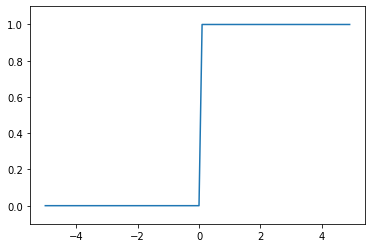

In [21]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

In [ ]:
np.arange(-5.0, 5.0, 0.2)は-5.0から5.0までの範囲を0.1刻みでNumpy配列を生成する.  
([-0.5, -4.9, …, 4.9]を生成します.)  
step_function()はNumPy配列を引数に取り, 配列の各要素に対してステップ関数を実行し, 結果を配列として返します.  
この, x, y 配列をプロットすると結果は次の図3-6のようになります.  
図3-6で表されるように, ステップ関数は0を境にして,出力が0から1(または, 1から0)へ切り替わります.  
図3-6のように階段上に値が切り替わる形からステップ「階段関数」とよばれることもおすすめす.  

### 3.2.4 シグモイド関数の実装

シグモイド関数を実装しましょう.  
式(3.6)のシグモイド関数はPythonで次のように書くことができます.  

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

ここでnp.exp(-x)は数式のexp(-x)に対応します.  
この実装は特に難しいことはありませんが, 引数のxにNumPy配列を入力しても, 結果は正しく計算されることに注意しましょう.  
実際, この**sigmoid**関数にNumPy配列を入力すると, 次のように正しく計算されます.  

In [51]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

シグモイド関数の実装がNumPy配列に対応していることは, NumPyのブロードキャストに秘密があります.  
ブロードキャストの機能により, スカラ値とNumPy配列での演算が行われると, スカラ値とNumPy配列の各要素どうしで演算が行われます.  
ここでもひとつ具体例を示しましょう.

In [52]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [53]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

上の例えでは, スカラ値(例では, 1.0)とNumPy配列の間で数値演算(+や/など)が行われています.  
結果としてスカラ値とNumPy配列の各要素の間で演算が行われ, 演算の結果がNumPy配列として出力されています.  
先のシグモイド関数の実装でも, np.exp(-x)はNumPy配列を生成するため, 1 / (1 + np.exp(-x))の結果は, NumPy配列の各要素の間で計算されることになります.  
それでは, シグモイド関数をグラフに描画します.  
描画のためのコードは, 先のステップ関数のコードとほとんど同じです.  
唯一異なる箇所は, yを出力する関数をsigmoid関数に変更する点です.  

In [54]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

NameError: name 'plt' is not defined

### 3.2.5 シグモイド関数とステップ関数の比較

シグモイド関数とステップ関数を見比べてみましょう.  ステップ関数とシグモイド関数を図3-8に示す.2つの関数のことあっている点はどこでしょうか?  
また, どのような点が共通する性質と言えるでしょうか?図3-8を観察して考えてみましょう.  
図3-8を見てまず気づく点は「滑らかさ」の違いだと思います.シグモイド関数は滑らかな曲線であり, 入力に対して連続的に出力が変化します.一方ステップ関数は0を境に急に出力を変えています.  
このシグモイド関数の滑らかさが, ニューラルネットワークの学習において重要な意味を持ちます.

また,ステップ関数が0か1のどちらかの値しか返さないのに対して, シグモイド関数は実数(0.731…や0.880…などを返すという点も異なります.つまり,パーセプトロンではニューロン間を0か1の二値の信号が流れていたのに対して, ニューラルネットワークでは連続的な実数値の信号が流れます.  

続いてステップ関数とシグモイド関数の共通する性質についてです.ステップ関数とシグモイド関数では, "滑らかさ"という点では異なりますが, 図3-8を大きな視点で見ると同じような形をしていることが分かります.  
実際両者とも入力が小さいときに出力は0に近く入力が大きくなるに従い出力が1に近づくという構造をしています. つまり, ステップ関数とシグモイド関数は, 入力信号が重要な情報であれば大きな値を出力し, 入力信号が重要でなければ小さな値を出力するのです. そしてどんなに入力信号の値が小さくても, またどんなに入力信号の値が大きくても, 出力信号の値を0から1の間に押し込めるのも両者の共通点です.  

### 3.2.6 非線形関数

ステップ関数とシグモイド関数の共通点は他にもあります. 重要な共通点は, 両者はともに**非線形関数**であるということです.  
シグモイド関数は曲線, ステップ関数は階段のような折れ曲がった直線で表され, ともに非線形な関数に分類されます.  
ニューラルネットワークでは, 活性化関数に非線形関数を用いる必要があります.  
これは言い換えると, 活性化関数には線形関数を用いてはならない, ということです.  
なぜ線形関数を用いてはならないのでしょうか.  
それは, 線形関数を用いると, ニューラルネットワークで層を深くすることの意味がなくなってしまうからです.  

線形関数の問題点は, どんなに層を深くしても, それと同じことを行う「隠れ層のないネットワーク」が必ず存在する,という事実に起因します. 
このことを具体的に(やや直観的に)理解するために, 次の簡単な例を考えてみましょう.  
ここでは,線形関数である$h(x) = cx$を活性化関数として, $y(x) = h(h(h(x)))$を行う計算を3層のネットワークに対応させて考えることにします.  
この計算は, $y(x) = c × c × c$の掛け算を行いますが, 同じことは$y = ax$の1回の掛け算で, つまり, 隠れ層のないネットワークで実現できます.  
この例のように、線形関数を用いたっ場合,　多層にすることの利点の移転をi行くことができます  
そのため, 層を重ねることの恩恵を得るためには 活性化関数に非線形を使う必要があるのです.
   

### 3.2.7 ReLU関数

これまでに, 活性化関数としてステップ関数とシグモイド関数を紹介しました.  
シグモイド関数は, ニューラルネットワークの歴史において, 古くから利用されてきましたが, 最近では**ReLU**(Rectified Linear Unit)という関数が主に用いられます.  
ReLUは, 入力が0を超えていれば, その入力をそのまま出力し, 0以下ならば0を出力する関数です.  

ReLU関数を数式で表すと, 次の式(3.7)のように書くことができます.

$$
    \mathrm{h(x)} =
        \begin{cases}
            x \quad ( x > 0 ) \\
            0 \quad ( x \leqq 0 ) \\
        \end{cases}
    \tag{2.2}
$$

In [55]:
グラフや数式の通り, ReLU巻子はとてもシンプルな関数です.  
そのため, ReLU関数の実装も簡単で, 次のように書くことができます.  

SyntaxError: invalid syntax (<ipython-input-55-ee9b6b55fbf0>, line 1)

In [56]:
def relu(x):
    return np.maximum(0, x)

In [57]:
ここでは, NumPyのmaximuという関数をつかっています.  
このmaximumは, 入力された値から大きい方の値を選んで出力する関数です.  

SyntaxError: invalid syntax (<ipython-input-57-98c50ba4b0f2>, line 1)

### 3.3 多次元配列の計算

### 3.3.1 多次元配列

In [58]:
多次元配列とは, 簡単に言うと「数字の集合」です.  
数字が1列に並んだものや長方形状に並べたもの, 3次元状に並べたものや(より一般化した)N次元状に並べたものを多次元配列といいます.  
それではNumPyを使って, 多次元配列を作成します.  
まずは, これまで見てきた1次元の配列からです.

SyntaxError: invalid character in identifier (<ipython-input-58-9733f108fe66>, line 1)

In [59]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [60]:
np.ndim(A)

1

In [61]:
A.shape

(4,)

In [62]:
A.shape[0]

4

ここで示すように,配列の次元すはnp.ndim()関数で取得できます.  
また,配列の形状はインスタンス変数のshapeから取得できます.  
上の例では, Aは1次元の配列であり, 4つの要素から構成されていることがわかります.  
なお, ここではA.shapeの結果がタプルになっていることに注意しましょう.  
これは,1次元配列の場合であっても, 多次元配列の場合と同じ統一された結果を返すからです.  
たとえば, 2次元配列のときは(4, 3), 3次元配列のときは(4, 3, 2)といったタプルが返されるため, 次元数が1の1次元配列のときも同様にタプルとして結果がかえされます.  
それでは, 続いて2次元の配列を作成します.  

In [63]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [64]:
np.ndim(B)

2

In [65]:
B.shape

(3, 2)

ここでは「3 × 2 の配列」であるBを作成しています. 
3 × 2 の配列とは, 最初の次元に2つの要素があり, 次の次元に2つの要素があるという意味です.  
なお, 最初の次元には0番目の次元, 次の次元は1番目の次元に対応します(Pythonのインデックスは0から始まります).  
また, 2次元配列は**行列**(matrix)と呼びます.  
図3-10 に示すように, 配列の横方向の並びを**行**(row), 縦方向の並びを**列**(column)と呼びます.  

### 3.3.2 行列の積

続いて, 行列(2次元配列)の積について説明します.  
行列の積は, たとえば, 2 × 2の行列の場合, 図3-11のように計sなします(次の手順で計算することが定義されています).  
この例で示すように, 行列の積は, 左側の行列の行(横方向)と右側の行列の列(縦方向)の間の要素ごとの積とその和によって計算が行われます.  
そして, その計算の結果は新しい多次元配列の要素として格納されます.  
たとえば, **A**の1行目と**B**の1列目の結果は1行目1列目の要素, **A**の2行目と**B**の1列目は2行1列目の要素といったようになります.  
なお, 本書では数式の表記において, 行列は太字で表すことにします.  
たとえば, 行列は**A**のように表記し, 要素がひとつのスカラ値(たとえば, a, b)とは区別します.  
さて, この計算をPythonで実装すると次のようになります.  

In [66]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [67]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [68]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

ここで, AとBは2 × 2の行列であり, **A**と**B**の行列の積をNumPyの関数**np.dot()**\で計算します(この**dot**は「ドット積」を意味します).  
**np.dot**(ドット積)は, 1次元配列の場合はベクトルを, 2次元配列では行列の積を計算します.  
ここで注意が必要なのは, **np.dot(A, B)**\と**np.dot(B, A)**\は異なる値になりえるということです.  
通常の演算(+や\*など)と違って, 行列の積では, 被演算子(A, B)の順番が異なると, 結果も異なります.  
さて, ここでは2 × 2の形状の行列について, その積を求める例を示しましたが, 別の形状の行列の積についても, 同様に計算することができます.  
たとえば, 2 × 3の行列と3 × 2の行列の積をPythonで実装すると次のようになります.  

In [69]:
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [70]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [71]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

2 × 3の行列**A**と3 × 2の行列**B**の積は上のように実装できます.  
ここで注意するべき点は「行列の形状(**shape**)」についてです.  
具体的に言うと, 行列**A**の1次元目の要素数(列数)と行列**B**の0次元目の要素数(行数)を同じ値にする必要があります.  
実際に, 上の例では, 行列**A**は2 × 3, 行数**B**は3 × 2であり, 行列**A**の1次元目の要素数(3)と行列**B**の0次元目の要素数(3)は同じ値です.  

In [72]:
C = np.array([[1,2], [3,4]])
C.shape

(2, 2)

In [73]:
A.shape

(2, 3)

In [74]:
np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

このエラーが述べていることは, 行列**A**の1次元目の行列**C**の0次元目の次元の要素数が一致していない, ということです(次元のインデックスは0番目から始まります).  
つまり, 多次元配列の積では, 2つの行列で対応する次元の要素数を一致させる必要があるということです.  
これは大切な点なので,図3-12でもう一度確認しましょう.

図3-12には, 3 × 2の行列**A**と2 × 4の行列**B**の積によって, 3 × 4の行列**C**が生成される例が示されています.  
この図が示すように, 行列**A**と**B**の対応する次元の要素数は一致させる必要があります.  
そして,計算結果である行列**C**は, 行列**A**の行数と行列**B**の列数から構成されます---これも重要な点です.  
なお, **A**が2次元の行列で, **B**が1次元の配列の場合でも, 次の図3-13で示すように, 「対応する次元の要素数を一致させる」という同じ原則が成り立ちます.  


図3-13の例をPythonで実装すると次のようになります.

In [75]:
A = np.array([[1,2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [76]:
B = np.array([7, 8])
B.shape

(2,)

In [77]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 ニューラルネットワークの行列の積

それでは, NumPy行列を使ってニューラルネットワークの実装を行いましょう.  
ここでは図3-14の簡単なニューラルネットワークを対象とします.  
このニューラルネットワークは, バイアスと活性化関数は省略し, 重みだけがあるものとします.  
実装に関しては, **X**, **W**, **Y**の形状に注意しましょう.  
特に, **X**と**W**の対応する次元の要素数が一致していることが重要な点です.  

In [78]:
X = np.array([1, 2])
X.shape

(2,)

In [79]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [80]:
W.shape

(2, 3)

In [81]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


ここで示したように,np.dot(多次元のドット積)を使えば, Yの結果を一度に計算することができます.  
これが意味することは、 もしYの要素数が100や1000であったとしても, 一度の演算で計算するできるということです
もし, np.dotを使わなければ, Yの要素をひとつずつ取り出して計算しなければならない(または, for文お使って計算をしなければならない)ので, とても面倒です. 
そのため, 行列の積によって一度で計算ができるというテクニックは, 実装上とても重要であると言えます.  

### 3.4 3層ニューラルネットワークの実装

それでは, "実践的"なニューラルネットワークの実装を行いましょう.  
ここでは, 図3-15に示す3層ニューラルネットワークを対象として, その入力から出力への処理(フォワード方向への処理)を実装します.  
実装に関しては, 前節で説明したNumPyの多次元配列を使います.  
NumPy配列を上手く使う事で, ほんの少しのコードでニューラルネットワークのフォワード処理を完成させることができます.

### 3.4.1 記号の確認

ここではニューラルネットワークで行う処理を説明するにあたって, w12(1)やa1(1)などの記号を導入します. 
やや込み入った印象を受けるかもしれませんが, これらの記号は本節だけで使用するものなので, 軽く読み飛ばしてもらっても問題ありません.  

それでは,初めに記号の定義から始めます. 
次の図3-16を見てください. 
図3-16は入力層のx2のニューロンから, 次層のニューロンa1(1)への重みだけをピックアップして図示しています.
図3-16に示すとおり, 重みや隠れ層のニューロンの右上には「(1)」とあります. 
これは,第1層の重み,第1層のニューロン,ということを意味する番号です. 
また, 重みの右下には2つ数字が並びますが, これは, 次層のニューロンと前層のニューロンのインデックス番号から構成されます.  
例えば, w12(1)は前層の2番目のニューロン(x2)から次層の1番目のニューロン(a1(1))への重みであることを意味します.  
重み右下のインデックス番号は「次層の番号, 前層の番号」の順に並ぶことにします.  

### 3.4.2 各層における信号伝達の実装

それでは, 入力層から「第1層目の1番目のニューロン」への信号の伝達を見ていきます. 
図3-17のようになります.

図3-17に示す通り, バイアスのためのニューロンである①が追加されています.
ここでは, バイアスの右下のインデックスがひとつしかないことに注意しましょう.
これは前層のバイアスニューロン(①ニューロン)がひとつだけしか存在しないためです. 
それではこれまでの確認も含めて, a1(1)を数式で表しましょう. 
a1(1)は重み付き信号とバイアスの和で次のように計算されます.

$$
    \mathrm{a_1^{(1)}} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}
    \tag{3.8}
$$

また, 行列の積を用いると, 第1層目の「重み付き和」は次の式でまとめて表すことができます.

$$
    \mathrm{A^{(1)}} = XW^{(1)} + B^{(1)}
    \tag{3.9}
$$

ただし,
$ A^{(1)} $ , $ X $ , $ B^{(1)} $ , $ W^{(1)} $
は下記の通りです.  

$$
    \mathrm{A^{(1)}} = \Biggl( a_1^{(1)} a_2^{(1)} a_3^{(1)} \Biggr)
    \
$$
, 
$$
    \mathrm{ X } = \Biggl( x_1 x_2 \Biggr)
    \
$$
,
$$
    \mathrm{B^{(1)}} = \Biggl( b_1^{(1)} b_2^{(1)} b_3^{(1)} \Biggr)
    \
$$
, 
$$
    \mathrm{W^{(1)}} = \begin{pmatrix}
        w_{11}^{(1)} & w_{21}^{(1)} &  w_{31}^{(1)} \\
        w_{12}^{(1)} & w_{22}^{(1)} &  w_{32}^{(1)}
    \end{pmatrix}
    \
$$


それでは, NumPyの多次元配列を使って, 数式(3.9)を実装しましょう(ここでは, 入力信号, 重み, バイアス,は適当な値に設定しています). 

In [82]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [83]:
print(W1.shape) # (2, 3)

(2, 3)


In [84]:
print(X.shape) # (2, )

(2,)


In [85]:
print(B1.shape) # (3, )

(3,)


**A1 = np.dot(X, W1) + B1**

この計算は前節で行った計算と同じです. 
Wは2 × 3の配列, Xは要素数が2の1次元配列です.  
ここでもやはり, W1とXの対応する次元の要素数が一致しています.  
続いて,第1層目の活性化関数によるプロセスを見ていきます.  
この活性化関数によるプロセスを図で表すと, 次の図3-18のようになります.  
図3-18に示す通り, 隠れ層での重み付き和(重み付き信号とバイアスの総和)を$a$で表し, 活性化関数で変換された信号を$z$で表すことにします. 
また, 図では活性化関数を$h()$で表し, ここではシグモイド関数を使うことにします. 
これをPythonで実装すると, 次のようになります.

**Z1 = sigmoid(A1)**

In [86]:
A1 = np.dot(X, W1) + B1

In [87]:
Z1 = sigmoid(A1)

In [88]:
print(A1) # [0.3 0.7 1.1]

[0.3 0.7 1.1]


In [89]:
print(Z1) # [0.57444252 0.66818777 0.75026011]

[0.57444252 0.66818777 0.75026011]


In [ ]:
このsigmoid()関数は, 前に定義した関数です. 
この関数は, NumPy配列を受け取り, 同じ要素数からなるNumPyヒア列を返します.

In [ ]:
それでは続いて, 第1層から第2層目までの実装を行います. (図3-19)

In [93]:
W2 = np.array([[1.0, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [94]:
print(Z1.shape)

(3,)


In [95]:
print(W2.shape)

(3, 2)


In [96]:
print(B2.shape)

(2,)


**A2 = np.dot(Z1, W2) + B2**  
**Z2 = sigmoid(A2)**

この実装は, 第1層の出力(**Z1**)が第2層への入力になっている点を除けば, 先程の実装とまったく同じです.
NumPy配列を使う事で, 層から層への信号の伝達が簡単に書けることがわかります. 

最後に, 第2層目から出力層への信号の伝達です(図3-20).
出力層の実装も, これまでの実装とほとんど同じです. 
ただし最後の活性化関数だけあ, これまでの隠れ層とは異なります. 

In [97]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [98]:
def identity_function(x):
    return x

In [99]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [100]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

ここでは, identity_function()という関数を定義して, この関数--これを「恒等kな数」と言います--を出力層の活性化関数として利用します. 
恒等関数は, 入力をそのまま出力する関数です. 
そのため, この例では, わざわざidentity_function()を定義する必要はないのですが, これまでの流れと統一するため, このような実装にしています. 
なお, 図3-20の表記では, 出力層の活性化関数は$\sigma()$で表し, 隠れ層の活性化関数$h()$とは異なることを示しています
($\sigma$は「シグマ」と言います). 

### 3.4.3 実装のまとめ

これで3層ニューラルネットワークの説明は終わりです. 
それでは, ここまで行ってきた実装をまとめて書いてみることにします.  
なお, ここでは, ニューラルネットワークの実装の慣例といて, 重みだけを**W1**といったように大文字で表記し, それ以外(バイアスや中間結果など)は小文字で表記します.  

In [106]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [107]:
def forward(newtwork, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [110]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


ここでは, init_network(), forward()という関数を定義しています 
init_network()関数で, 重みとバイアスの初期化を行い, それらをディクショナリ型の変数networkに格納します. 
このディクショナリ型の変数networkには, それぞれの層で必要なパラメータ--重みとバイアス--が格納されています. 
そして, forward()関数では, 入力信号が出力へと変換されるプロセスがまとめて実装されています. 
なお, ここでforwardという単語が出てきましたが, これは入力から出力方向への伝達処理を表しています. 
後ほど, ニューラルネットワーク学習を行う際に, バックワード(backword)方向--出力から入力方向--の処理について見ていく予定です. 

これで, ニューラルネットワークのフォワード方向の実装は終わりです. 
NumPyの多次元配列をうまく使うことで, ニューラルネットワークの実装を効率的に行うことができました. 

### 3.5 出力層の設計

ニューラルネットワークは, 分類問題と回帰問題の両方に用いることができます. 
ただし, 分類問題と回帰問題のどちらに用いるかで, 出力層の活性化関数を変更する必要があります. 
一般的に, 回帰問題で恒等関数を, 分類問題でソフトマックス関数を使用します. 

### 3.5.1 恒等関数とソフトマックス関数

恒等関数は, 入力をそのまま出力します 
入ってきたものに対して何も手を加えずに出力する関数--それが恒等関数です. 
そのため, 出力層で恒等関数をもちるときは, 入力信号をそのまま出力するだけになります. 
なお, 恒等関数によるプロセスをこれまで見てきたニューラルネットワークの図で表すとすれば, 図3-21のように書くことができます. 
恒等関数によって変換されるプロセスは, これまでの隠れ層での活性化関数と同じで, 1本の矢印で描画します. 

一方, 分類問題で使われるソフトマックス関数は, 次の式で表されます.

$$
    \mathrm{y_k} = \frac{\exp(a_k)}{\sum_{i=1}^n\exp(a_i)}
    \tag{3.10}
$$

$exp(x)$は, $e^x$を表す指数関数です. ($e$は2.718…のネイピア数)
ここでは出力層が全部で$n$個あるとして, $k$番目の出力$y_k$を求める計算式をあらわしています. 
式(3.10)に示すように, ソフトマックス関数の分子は入力信号$a_k$の指数関数, 分母はすべての入力信号の指数関数の和から構成されます. 

なお, ソフトマックス関数を図で表すと, 次の図3-22のようになります. 
図に示すように, ソフトマックスの出力は, すべての入力信号から矢印による結びつきがあります.  
式(3.10)の分母から分かるように, 出力の各ニューロンが, すべての入力信号から影響を受けることになるからです.  

それでは, ソフトマックス巻子を実装しましょう. 
ここではPythonインタプリタを使って, ひとつずつ結果を確認しながらすすみたいと思います. 

In [113]:
a = np.array([0.3, 2.9, 4.0])

In [114]:
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [115]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [116]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
この実装は, 式(3.10)のソフトマックス関数をそのままPythonで表現したものです. 
そのため, 特に解説はひつようないでしょう. 
ここでは, 後ほどソフトマックス関数を使う事を考えてPythonの関数として次のように定義することにします. 

In [117]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y